In [ ]:
from metrics_util import * 

In [13]:

y_true = [0, 0, 1, 1]  
y_score = [0.1, 0.4, 0.35, 0.8]  

### bootstrap_mean

In [15]:
rng = np.random.default_rng(42)
data = np.array([1, 2, 3, 4, 5])
bootstrap_mean = bootstrap(np.mean, rng)
result = bootstrap_mean(data)
print("Bootstrap Results:")
print(result)

Bootstrap Results:
{'std_err': 0.6363942470180238, 'low': 2.0, 'high': 4.0}


In [ ]:
# # 封装 compatible_bootstrap，对 auroc 进行引导采样分析，计算 AUC 的标准误差和置信区间

# rng = np.random.default_rng(42)
# bootstrap_auroc = compatible_bootstrap(auroc, rng)

# # 定义真实标签和预测分数
# y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
# y_score = [0.1, 0.9, 0.8, 0.4, 0.95, 0.2, 0.85, 0.5, 0.88, 0.9]

# # 调用封装后的引导采样函数
# result = bootstrap_auroc(y_true, y_score)

# print("Bootstrap AUROC Results:")
# print(result)

### auroc

在 AUC 高的情况下，confidence越高，true的可能性越高，align的越好

正类样本（y_true=1）的预测分数（y_score）通常比负类样本（y_true=0）的预测分数高

y_score = 0.9 时，样本更可能是正类；
y_score = 0.2 时，样本更可能是负类。

如果 AUC 较低（接近 0.5），则说明模型区分正类和负类的能力接近随机猜测。

In [16]:

auc_result = auroc(y_true, y_score)

print("AUROC Result:")
print(auc_result)

AUROC Result:
0.75


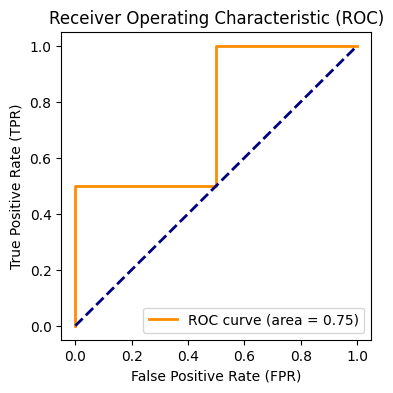

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 计算 FPR, TPR
fpr, tpr, thresholds = roc_curve(y_true, y_score)

# 计算 AUROC
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 随机猜测的基线
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### accuracy_at_quantile

这个指标衡量模型在confidence很高的情况下，准确率如何，来测量confidence与acc校验

In [18]:
accuracies = np.array([1, 0, 1, 1, 0, 1, 0, 1])

# 样本预测的不确定性
uncertainties = np.array([0.1, 0.4, 0.2, 0.8, 0.6, 0.3, 0.5, 0.05])

quantile = 0.25  # 取不确定性最低的前 25% 样本

result = accuracy_at_quantile(accuracies, uncertainties, quantile)
print(f"Average accuracy at {quantile*100:.0f}% quantile: {result:.2f}")

Average accuracy at 25% quantile: 1.00
